# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [44]:
#Import Modules
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from citipy import citipy
import os

#Import API Key
from api_keys import api_key

#Define Current Path & Items in Current Working Directory
current_path = os.getcwd()
current_directory = os.listdir()

#Loop Through Items in Current Working Directory
for item in current_directory:
    
    #Find Folder for Global Weather Data
    if item.lower().find('global weather data') >= 0:
        
        #Define Output File Name & Path
        output_file = current_path + '/' + item + '/Global_Weather_Data.csv'
        
    #Find Folder for Output Plots
    elif item.lower().find('images') >= 0:
        
        #Define File Path for Output Plots
        output_plot = current_path + '/' + item + '/'

#Define Range of Latitudes & Longitudes
lat_range = (-90, 90)
long_range = (-180, 180)

## Generate Cities List

In [45]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

#Create Set of Random Latitude & Longitude Combinations
lats = np.random.uniform(low = lat_range[0], high = lat_range[1], size = 2000)
lngs = np.random.uniform(low = long_range[0], high = long_range[1], size = 2000)
lat_lngs = zip(lats, lngs)

#Loop Through Latitude & Longitude Combinations
for lat_lng in lat_lngs:
    
    #Collect Name of Nearest City for Each Latitude & Longitude Combination
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    #Check if City Name Has Already Been Found
    if city not in cities:
        
        #Append New City Names to Final List of Cities
        cities.append(city)

#Print Length of City Name List
len(cities)

761

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [46]:
#Set Open Weather Map API Base URL
base_url = 'http://api.openweathermap.org/data/2.5/weather?q='

#Define Python Lists for Individual Weather Parameters
city = []
cloud = []
country = []
date = []
humidity = []
latitude = []
longitude = []
temp = []
wind = []

#Set Counter Variable for API Status Messages
count_1 = 1

#Print API Start Status Message
print('Starting Weather Data Collection from API.')
print('----------------------------------')

#Loop Through List of City Names
for name in cities:
    
    #Set Full API URL for Individual City
    full_url = base_url + name + '&APPID=' + api_key + '&units=imperial'
    
    #Collect Individual City Data from API
    raw_data = requests.get(full_url).json()
    
    #Print API Status Message for Individual City
    print('Processing City ' + str(count_1) + ': ' + name.title())
    
    #Set Condition for City Found In API Database
    if raw_data['cod'] == 200:
        
        #Write Individual City Data to Individual Weather Parameter Lists
        city.append(raw_data.get('name'))
        cloud.append(raw_data['clouds']['all'])
        country.append(raw_data['sys']['country'])
        date.append(raw_data['dt'])
        humidity.append(raw_data['main']['humidity'])
        latitude.append(raw_data['coord']['lat'])
        longitude.append(raw_data['coord']['lon'])
        temp.append(raw_data['main']['temp_max'])
        wind.append(raw_data['wind']['speed'])
    else:
        
        #Print API Status Message For Individual City No Found in API Databse
        print(name.title() + ' Not Found! Skipping!')
    
    #Pause Code to Prevent Exceeding API Call Limit
    time.sleep(1.5)
    
    #Increment Counter Variable for API Status Messages
    count_1 = count_1 + 1

#Print API End Status Message
print('----------------------------------')
print('Weather Data Collection Completed')

Starting Weather Data Collection from API.
----------------------------------
Processing City 1: Lorut
Processing City 2: Atuona
Processing City 3: Mogadishu
Processing City 4: Marawi
Processing City 5: Busselton
Processing City 6: Goderich
Processing City 7: Thompson
Processing City 8: Oda
Processing City 9: Avarua
Processing City 10: Cherskiy
Processing City 11: Jamestown
Processing City 12: Leh
Processing City 13: Ushuaia
Processing City 14: Kapaa
Processing City 15: Muhos
Processing City 16: Ostrovnoy
Processing City 17: Arkhipo-Osipovka
Processing City 18: Ponta Delgada
Processing City 19: Bluff
Processing City 20: Nelson Bay
Processing City 21: Westport
Processing City 22: Monastyrshchina
Processing City 23: Saldanha
Processing City 24: Henties Bay
Processing City 25: Taolanaro
Taolanaro Not Found! Skipping!
Processing City 26: Bengkulu
Bengkulu Not Found! Skipping!
Processing City 27: Barentsburg
Barentsburg Not Found! Skipping!
Processing City 28: Hermanus
Processing City 29: I

Processing City 253: Hualmay
Processing City 254: Yar-Sale
Processing City 255: Bagdarin
Processing City 256: Singleton
Processing City 257: Port Elizabeth
Processing City 258: Qaqortoq
Processing City 259: Kholtoson
Processing City 260: Richards Bay
Processing City 261: Batsfjord
Processing City 262: East London
Processing City 263: Atar
Processing City 264: Mopti
Processing City 265: Okhotsk
Processing City 266: Tiksi
Processing City 267: Lapeer
Processing City 268: Talara
Processing City 269: Arman
Processing City 270: Lompoc
Processing City 271: Kibala
Processing City 272: Kjollefjord
Processing City 273: Pisco
Processing City 274: Havre-Saint-Pierre
Processing City 275: Kondinskoye
Processing City 276: Mbouda
Processing City 277: Belushya Guba
Belushya Guba Not Found! Skipping!
Processing City 278: Grand Gaube
Processing City 279: Sioux Lookout
Processing City 280: Wuwei
Processing City 281: Ko Samui
Processing City 282: Tromso
Processing City 283: Takoradi
Processing City 284: Ta

Processing City 490: Souillac
Processing City 491: Posse
Processing City 492: Wakkanai
Processing City 493: Bambous Virieux
Processing City 494: Sri Aman
Processing City 495: Yantal
Processing City 496: Coracao De Jesus
Processing City 497: Gravelbourg
Processing City 498: Puerto Del Rosario
Processing City 499: Vestmannaeyjar
Processing City 500: Fukue
Processing City 501: Te Anau
Processing City 502: Bolungarvik
Bolungarvik Not Found! Skipping!
Processing City 503: Show Low
Processing City 504: Orapa
Processing City 505: Praya
Processing City 506: Petropavlovsk-Kamchatskiy
Processing City 507: Plettenberg Bay
Processing City 508: Tabiauea
Tabiauea Not Found! Skipping!
Processing City 509: Luwuk
Processing City 510: Terek
Processing City 511: Moose Factory
Processing City 512: Nemuro
Processing City 513: Kintampo
Processing City 514: Half Moon Bay
Processing City 515: Resistencia
Processing City 516: Mozarlandia
Processing City 517: Dumbea
Processing City 518: Saleaula
Saleaula Not Fo

Processing City 735: Vestmanna
Processing City 736: Tubarao
Processing City 737: Nago
Processing City 738: Svetlyy
Svetlyy Not Found! Skipping!
Processing City 739: Antsohihy
Processing City 740: Noumea
Processing City 741: Kieta
Processing City 742: Soyo
Processing City 743: Kulhudhuffushi
Processing City 744: Beni
Processing City 745: Mount Isa
Processing City 746: Machinga
Processing City 747: Palmer
Processing City 748: Povenets
Processing City 749: Khonuu
Khonuu Not Found! Skipping!
Processing City 750: San Nicolas
Processing City 751: Oksfjord
Processing City 752: Santa Barbara
Processing City 753: Stara Moravica
Processing City 754: Sao Borja
Processing City 755: Kalmunai
Processing City 756: Taltal
Processing City 757: Grahamstown
Processing City 758: Kangaatsiaq
Processing City 759: Othonoi
Othonoi Not Found! Skipping!
Processing City 760: Itacoatiara
Processing City 761: Camabatela
----------------------------------
Weather Data Collection Completed


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [47]:
#Create Data Frame of Combined City Weather
city_data = pd.DataFrame({'City': city, 'Cloudiness (%)': cloud, 'Country': country, 'Date': date, 'Humidity (%)': humidity,
                          'Latitude': latitude, 'Longitude': longitude, 'Max Temp (F)': temp, 'Wind Speed (mph)': wind})

#Display Combined City Weather Data Frame
city_data

,City,Cloudiness (%),Country,Date,Humidity (%),Latitude,Longitude,Max Temp (F),Wind Speed (mph)
0,Lorut,2,AM,1571355340,79,40.94,44.77,45.06,1.81
1,Atuona,1,PF,1571355341,73,-9.80,-139.03,80.36,17.18
2,Mogadishu,70,SO,1571355343,83,2.04,45.34,78.21,6.08
3,Marawi,83,PH,1571355345,86,8.00,124.29,80.01,1.01
4,Busselton,2,AU,1571355347,53,-33.64,115.35,55.99,14.74
5,Goderich,100,CA,1571355348,80,43.74,-81.71,51.01,24.70
6,Thompson,90,CA,1571355350,85,55.74,-97.86,41.00,4.70
7,Oda,75,JP,1571355352,72,35.19,132.50,66.20,18.34
8,Avarua,100,CK,1571355203,74,-21.21,-159.78,78.80,17.22
9,Cherskiy,86,RU,1571355355,94,68.75,161.30,21.06,12.66


In [48]:
#Export Combined City Weather Data Frame to CSV File
city_data.to_csv(output_file, index = False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

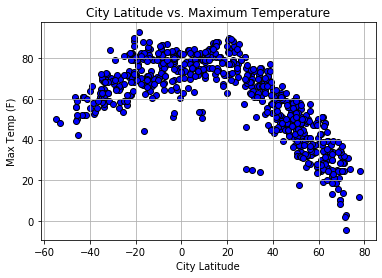

In [49]:
#Plot Latitude Data Versus Maximum Temperature Data
F1, AX1 = plt.subplots()
AX1.scatter(city_data['Latitude'], city_data['Max Temp (F)'], facecolor = 'blue', edgecolor = 'black')
AX1.grid()
AX1.set_title('City Latitude vs. Maximum Temperature')
AX1.set_xlabel('City Latitude')
AX1.set_ylabel('Max Temp (F)')
plt.savefig(output_plot + 'City_Latitude_vs_Maximum_Temperature.png')
plt.show()

#### Latitude vs. Humidity Plot

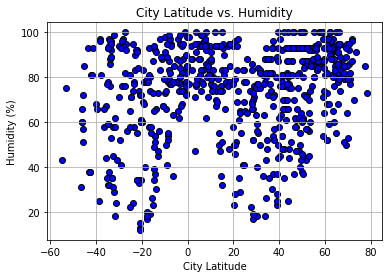

In [50]:
#Plot Latitude Data Versus Humidity Data
F2, AX2 = plt.subplots()
AX2.scatter(city_data['Latitude'], city_data['Humidity (%)'], facecolor = 'blue', edgecolor = 'black')
AX2.grid()
AX2.set_title('City Latitude vs. Humidity')
AX2.set_xlabel('City Latitude')
AX2.set_ylabel('Humidity (%)')
plt.savefig(output_plot + 'City_Latitude_vs_Humidity.png')
plt.show()

#### Latitude vs. Cloudiness Plot

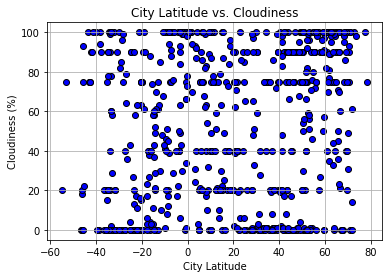

In [51]:
#Plot Latitude Data Versus Cloudiness Data
F3, AX3 = plt.subplots()
AX3.scatter(city_data['Latitude'], city_data['Cloudiness (%)'], facecolor = 'blue', edgecolor = 'black')
AX3.grid()
AX3.set_title('City Latitude vs. Cloudiness')
AX3.set_xlabel('City Latitude')
AX3.set_ylabel('Cloudiness (%)')
plt.savefig(output_plot + 'City_Latitude_vs_Cloudiness.png')
plt.show()

#### Latitude vs. Wind Speed Plot

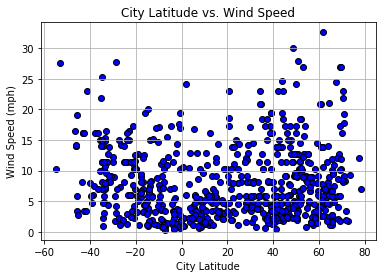

In [52]:
#Plot Latitude Data Versus Wind Speed Data
F4, AX4 = plt.subplots()
AX4.scatter(city_data['Latitude'], city_data['Wind Speed (mph)'], facecolor = 'blue', edgecolor = 'black')
AX4.grid()
AX4.set_title('City Latitude vs. Wind Speed')
AX4.set_xlabel('City Latitude')
AX4.set_ylabel('Wind Speed (mph)')
plt.savefig(output_plot + 'City_Latitude_vs_Wind_Speed.png')
plt.show()

## Observations

The purpose of this assignment was to analyze weather data from over 500 randomly selected global cities. The Numpy, Citipy, Requests, Pandas, and Matplotlib modules in Python were used to generate random latitude and longitude combinations, generate the city name and extract weather data from the Open Weather Map API for each combination, process that data to find certain metrics, and generate plots to display meaningful results. This allowed for several observations to be made from the data regarding how maximum temperature, humidity, cloudiness, and wind speed vary based on a city's latitude.